In [76]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas import read_csv

# set the path to the data files
path1 = 'OECD_GDP.csv'
path2 = 'OECD_Trade.csv'

# read the data files into pandas dataframes
gdp = read_csv(path1)
trade = read_csv(path2)



### Cleaning GDP Dataframe

In [77]:
gdp.head()

,LOCATION,Country,TRANSACT,Transaction,MEASURE,Measure,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2010,2010,USD,US Dollar,6,Millions,NaN,NaN,1.299463e+06,NaN,NaN
1,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2011,2011,USD,US Dollar,6,Millions,NaN,NaN,1.546689e+06,NaN,NaN
2,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2012,2012,USD,US Dollar,6,Millions,NaN,NaN,1.590708e+06,NaN,NaN
3,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2013,2013,USD,US Dollar,6,Millions,NaN,NaN,1.543216e+06,NaN,NaN
4,AUS,Australia,B1_GA,Gross domestic product (output approach),CXC,"Current prices, current exchange rates",2014,2014,USD,US Dollar,6,Millions,NaN,NaN,1.464256e+06,NaN,NaN


In [78]:
gdp.columns

Index(['LOCATION', 'Country', 'TRANSACT', 'Transaction', 'MEASURE', 'Measure',
       'TIME', 'Year', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [79]:
# Drop unnecessary columns from the gdp dataframe
gdp = gdp.drop(columns=['TRANSACT', 'Country', 'Transaction', 'MEASURE', 'Measure', 'Year', 'Unit Code', 'Unit', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'])

In [80]:
# Multiply the GDP values by 1,000,000 to convert to real GDP values
gdp['Value'] = gdp['Value']*1000000

In [81]:
# Drop PowerCode Code and PowerCode columns from the GDP dataframe
gdp = gdp.drop(columns=['PowerCode Code', 'PowerCode'])

In [82]:
# Rename remaining columns in the GDP dataframe to more meaningful names
gdp.columns = ['CountryCode', 'Year', 'GDP']

In [83]:
# Drop European Union from the GDP dataframe to avoid double counting
gdp = gdp[gdp['CountryCode'] != 'EU28']

In [84]:
gdp.head()

,CountryCode,Year,GDP
0,AUS,2010,1.299463e+12
1,AUS,2011,1.546689e+12
2,AUS,2012,1.590708e+12
3,AUS,2013,1.543216e+12
4,AUS,2014,1.464256e+12


### Cleaning TRADE Dataframe

In [85]:
trade.head()

,LOCATION,Reporter country,FLOW,Flow,PARTNER,Partner country,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2011,2011,USD,US Dollar,0,Units,NaN,NaN,73144918,NaN,NaN
1,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2012,2012,USD,US Dollar,0,Units,NaN,NaN,71483059,NaN,NaN
2,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2013,2013,USD,US Dollar,0,Units,NaN,NaN,67897422,NaN,NaN
3,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2014,2014,USD,US Dollar,0,Units,NaN,NaN,61114752,NaN,NaN
4,AUS,Australia,EXP,Exports,AUT,Austria,A,Annual,2015,2015,USD,US Dollar,0,Units,NaN,NaN,54730242,NaN,NaN


In [86]:
trade.columns

Index(['LOCATION', 'Reporter country', 'FLOW', 'Flow', 'PARTNER',
       'Partner country', 'FREQUENCY', 'Frequency', 'TIME', 'Time',
       'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [87]:
# Drop unnecessary columns from the trade Dataframe
trade = trade.drop(columns=['Flow', 'Reporter country', 'Partner country', 'FREQUENCY', 'Frequency', 'TIME', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode', 'Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'])

In [88]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29222 entries, 0 to 29221
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   LOCATION  29222 non-null  object
 1   FLOW      29222 non-null  object
 2   PARTNER   29222 non-null  object
 3   Time      29222 non-null  int64 
 4   Value     29222 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.1+ MB


In [89]:
trade['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'CHL', 'EST', 'ISR', 'SVN', 'LTU', 'LVA',
       'EU28'], dtype=object)

In [90]:
# Drop European Union from the trade dataframe to avoid double counting
trade = trade[trade['LOCATION'] != 'EU28']

In [91]:
# Renaming the columns in the trade dataframe to more meaningful names
trade.columns = ['CountryCode', 'TradeType', 'PartnerCountryCode', 'Year', 'TradeValue']

In [92]:
trade['PartnerCountryCode'].unique()

array(['AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU', 'GRC',
       'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX', 'NLD',
       'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE', 'TUR',
       'GBR', 'USA', 'ARG', 'BRA', 'CHL', 'CHN', 'EST', 'IND', 'IDN',
       'ISR', 'RUS', 'SAU', 'SVN', 'ZAF', 'AUS', 'OECD', 'G-20', 'LVA',
       'LTU', 'CRI', 'COL'], dtype=object)

In [93]:
# Remove 'OECD - Total' row and 'G20' row from the trade dataframe to avoid double counting
trade = trade[trade['PartnerCountryCode'] != 'OECD']
trade = trade[trade['PartnerCountryCode'] != 'G-20']

In [94]:
trade.head()

,CountryCode,TradeType,PartnerCountryCode,Year,TradeValue
0,AUS,EXP,AUT,2011,73144918
1,AUS,EXP,AUT,2012,71483059
2,AUS,EXP,AUT,2013,67897422
3,AUS,EXP,AUT,2014,61114752
4,AUS,EXP,AUT,2015,54730242


## Task 2A ##

i. . Create one line chart with two lines: • Total annual exports of all countries combined. • Total annual imports of all countries combined. Clearly distinguish the lines with labels and a legend.

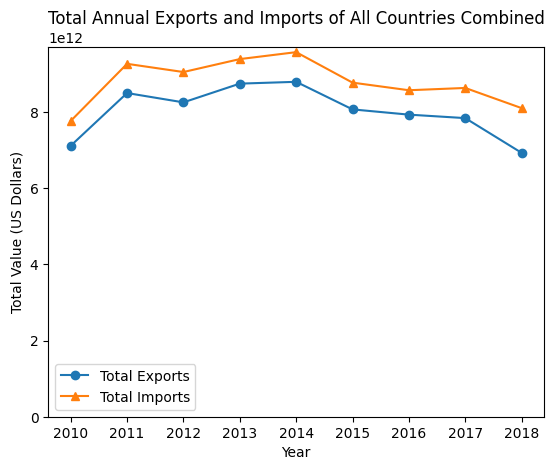

In [95]:
#filter for exports and imports
exports = trade[trade['TradeType'] == 'EXP']
imports = trade[trade['TradeType'] == 'IMP']

#group by year
exports_total = exports.groupby('Year')['TradeValue'].sum()
imports_total = imports.groupby('Year')['TradeValue'].sum()

plt.plot(exports_total, label='Total Exports', marker='o')
plt.plot(imports_total, label='Total Imports', marker='^')

#axis titles and legend
plt.xlabel('Year')
plt.ylabel('Total Value (US Dollars)')
plt.title('Total Annual Exports and Imports of All Countries Combined')
plt.legend(loc='best')

#axis 
plt.ylim(bottom=0)

plt.savefig('total-annual-exports-imports.png', bbox_inches='tight')

ii. Create a separate line chart showing the total annual net exports (calculated as Exports –
Imports) of all countries combined.

/var/folders/v0/hpm7rd7j4n39wr93kp2m5xwm0000gn/T/ipykernel_22899/51578556.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


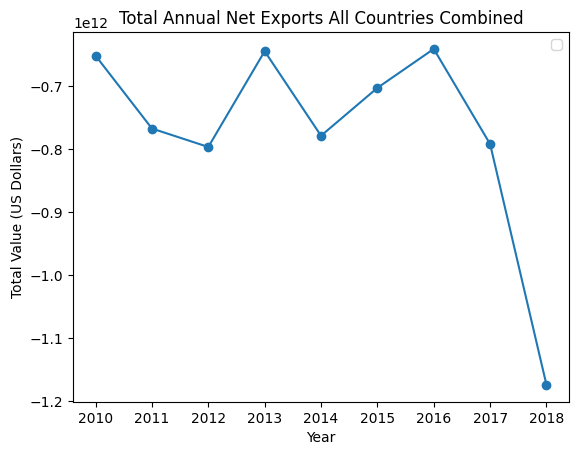

In [96]:
#filter for exports and imports
exports = trade[trade['TradeType'] == 'EXP']
imports = trade[trade['TradeType'] == 'IMP']

#group by year
exports_total = exports.groupby('Year')['TradeValue'].sum()
imports_total = imports.groupby('Year')['TradeValue'].sum()

#create net exports
net_exports = exports_total - imports_total

plt.plot(net_exports,marker='o')

#axis titles and legend
plt.xlabel('Year')
plt.ylabel('Total Value (US Dollars)')
plt.title('Total Annual Net Exports All Countries Combined')
plt.legend(loc='best')
plt.savefig('total-annual-net-exports.png', bbox_inches='tight')

iii. Create another line chart showing the total annual GDP of all countries combined.
iv. Examine the GDP chart for anomalies. If any are detected, propose potential reasons for
these discrepancies.

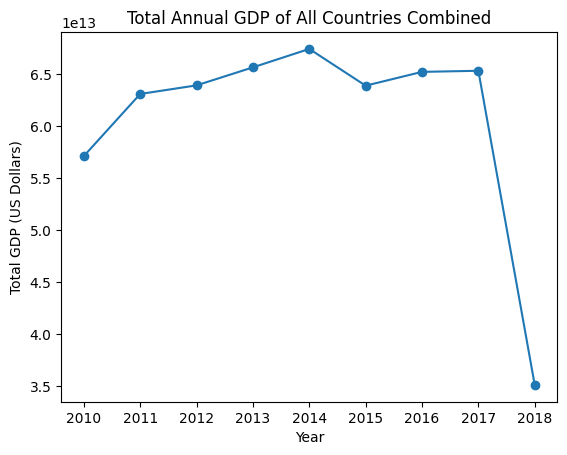

In [97]:
#group gdp by year
gdp_total = gdp.groupby('Year')['GDP'].sum()

plt.plot(gdp_total,marker='o')

#axis and titles
plt.xlabel('Year')
plt.ylabel('Total GDP (US Dollars)')
plt.title('Total Annual GDP of All Countries Combined')
plt.savefig('total-annual-gdp.png', bbox_inches='tight')

**TASK 2B**

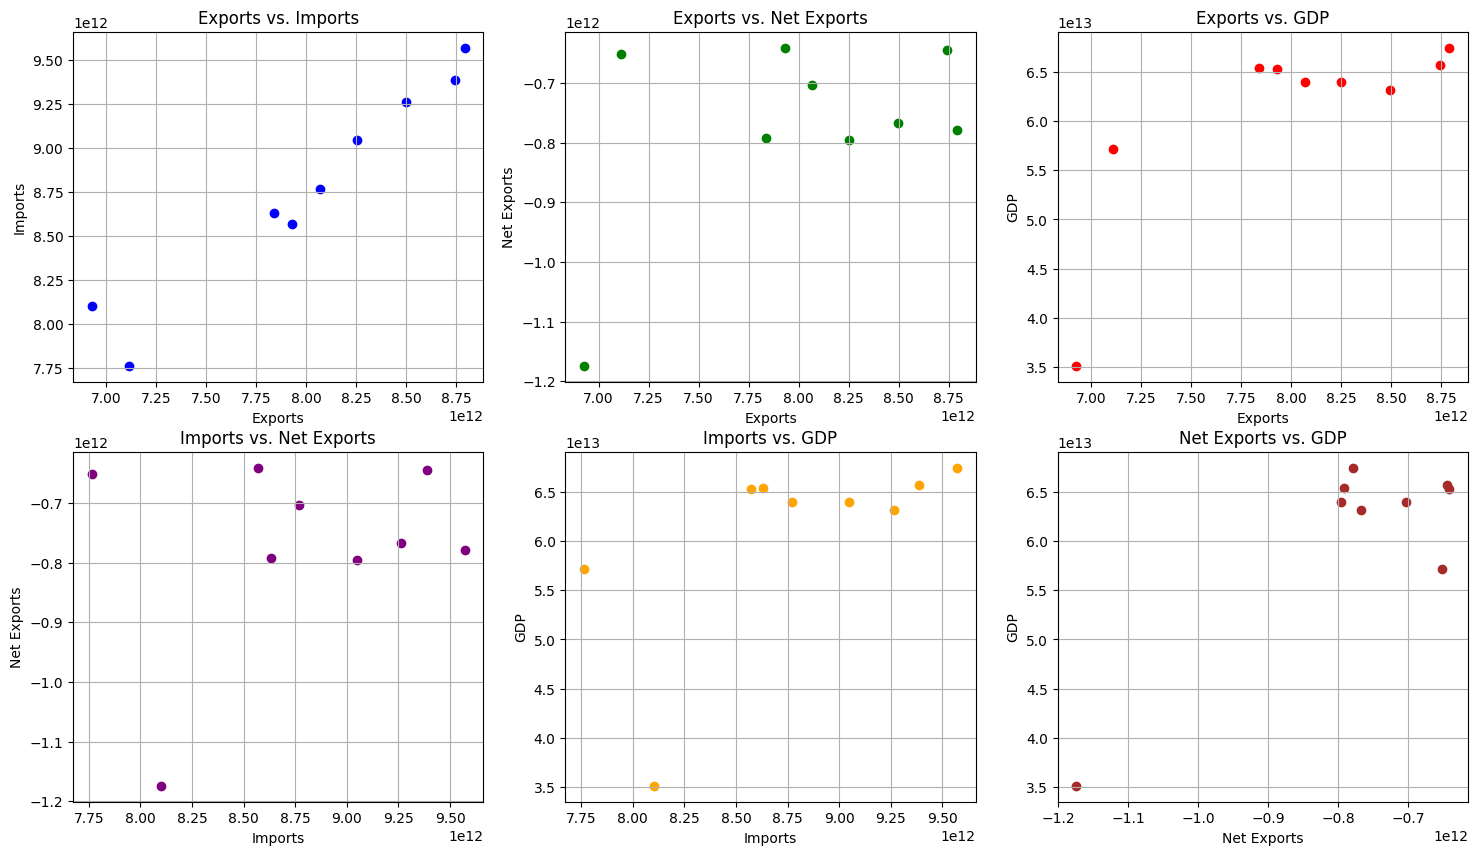

In [98]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot Exports vs. Imports
axes[0, 0].scatter(exports_total, imports_total, color='blue')
axes[0, 0].set_xlabel('Exports')
axes[0, 0].set_ylabel('Imports')
axes[0, 0].set_title('Exports vs. Imports')
axes[0, 0].grid(True) 

# Plot Exports vs. Net Exports
axes[0, 1].scatter(exports_total, net_exports, color='green')
axes[0, 1].set_xlabel('Exports')
axes[0, 1].set_ylabel('Net Exports')
axes[0, 1].set_title('Exports vs. Net Exports')
axes[0, 1].grid(True) 

# Plot Exports vs. GDP
axes[0, 2].scatter(exports_total, gdp_total, color='red')
axes[0, 2].set_xlabel('Exports')
axes[0, 2].set_ylabel('GDP')
axes[0, 2].set_title('Exports vs. GDP')
axes[0, 2].grid(True) 

# Plot Imports vs. Net Exports
axes[1, 0].scatter(imports_total, net_exports, color='purple')
axes[1, 0].set_xlabel('Imports')
axes[1, 0].set_ylabel('Net Exports')
axes[1, 0].set_title('Imports vs. Net Exports')
axes[1, 0].grid(True) 

# Plot Imports vs. GDP
axes[1, 1].scatter(imports_total, gdp_total, color='orange')
axes[1, 1].set_xlabel('Imports')
axes[1, 1].set_ylabel('GDP')
axes[1, 1].set_title('Imports vs. GDP')
axes[1, 1].grid(True) 

# Plot Net Exports vs. GDP
axes[1, 2].scatter(net_exports, gdp_total, color='brown')
axes[1, 2].set_xlabel('Net Exports')
axes[1, 2].set_ylabel('GDP')
axes[1, 2].set_title('Net Exports vs. GDP')
axes[1, 2].grid(True) 

plt.savefig('comparison-subplots.png', bbox_inches='tight')

# Show the plot
plt.show()

In [99]:
#group by year
#annual_ex_imp = trade.groupby(['Year', 'TradeType'])['TradeValue'].sum().reset_index()
#annual_ex_imp.columns = annual_ex_imp.columns.str.strip()
#annual_ex_imp

In [100]:
# Filter the DataFrame for 'EXP' (exports)
# annual_imp = annual_ex_imp[annual_ex_imp['TradeType'] == 'IMP']

# Group by year and sum the 'TradeValue' for each year (exports and imports)
#annual_exp_total = annual_exp.groupby('Year')['TradeValue'].sum()
#annual_imp_total = annual_imp.groupby('Year')['TradeValue'].sum()

# Plot the total exports and imports over time
#plt.plot(annual_exp_total.index, annual_exp_total.values, label='Total Exports', marker='o')
#plt.plot(annual_imp_total.index, annual_imp_total.values, label='Total Imports', marker='^')

# Axis titles and legend
#plt.xlabel('Year')
#plt.ylabel('Total Value (US Dollars)')
#plt.title('Total Annual Exports and Imports of All Countries Combined')
#plt.legend(loc='best')

# Set y-axis to start from 0 for better visibility
#plt.ylim(bottom=0)

# Show the plot
#plt.show()


# Task 3

#### Create a colormap with different colors
##### Use this instead of existing colormaps because some sequential/gradient colormaps (e.g., hsv, YlOrRd, etc.)  make it difficult to differentiate the area, while qualitative ones (e.g., tab20, tab10, etc.) don't have enough colors for all countries

In [101]:
import matplotlib.colors as mcolors

# Get a list of all color names in Python\
color_names = list(mcolors.CSS4_COLORS.keys())
print(color_names)

['aliceblue', 'antiquewhite', 'aqua', 'aquamarine', 'azure', 'beige', 'bisque', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chartreuse', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'cyan', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgreen', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgray', 'dimgrey', 'dodgerblue', 'firebrick', 'floralwhite', 'forestgreen', 'fuchsia', 'gainsboro', 'ghostwhite', 'gold', 'goldenrod', 'gray', 'green', 'greenyellow', 'grey', 'honeydew', 'hotpink', 'indianred', 'indigo', 'ivory', 'khaki', 'lavender', 'lavenderblush', 'lawngreen', 'lemonchiffon', 'lightblue', 'lightcoral', 'lightcyan', 'lightgoldenrodyellow', 'lightgray', 'lightgreen', 'lightgrey', 'lightpink', 'lightsalmon', 'lightseagreen', 

In [102]:
from matplotlib.colors import ListedColormap

# Create a list from color names bove
distinct_colors = ['aqua', 'azure', 'black', 'blanchedalmond', 'blue', 'blueviolet', 'brown', 'burlywood', 'cadetblue', 'chocolate', 'coral', 'cornflowerblue', 'cornsilk', 'crimson', 'darkblue', 'darkcyan', 'darkgoldenrod', 'darkgray', 'darkgrey', 'darkkhaki', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkorchid', 'darkred', 'darksalmon', 'darkseagreen', 'darkslateblue', 'darkslategray', 'darkslategrey', 'darkturquoise', 'darkviolet', 'deeppink', 'deepskyblue', 'dimgrey', 'indigo', 'lavenderblush', 'lemonchiffon', 'teal', 'thistle', 'tomato','orange', 'orangered', 'orchid', 'palegoldenrod', 'papayawhip', 'peachpuff', 'peru', 'pink', 'plum', 'powderblue', 'purple', 'rebeccapurple', 'red', 'rosybrown']

# Create a colormap from the list of colors
custom_colormap = ListedColormap(distinct_colors)

## Part 1. Total Annual Exports

In [103]:
# Make a copy of trade data filtering for exports data only
country_exports = trade[trade['TradeType'] == 'EXP'].copy()

# Convert value into per trillion USD (for better visibility when graphing)
country_exports['TradeValue'] = country_exports['TradeValue'] / 1_000_000_000_000

# Sum up each country exports for each year
country_exports = country_exports.groupby(['CountryCode', 'Year'])['TradeValue'].sum()

# Unstack the dataframe to have year as the rows and each country as a column
# Fill in 0 for empty/missing data
country_exports = country_exports.unstack(level='CountryCode').fillna(0)
country_exports

CountryCode,AUS,AUT,BEL,CAN,CHE,CHL,CZE,DEU,DNK,ESP,...,NLD,NOR,NZL,POL,PRT,SVK,SVN,SWE,TUR,USA
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,0.131927,0.375036,0.368100,0.170105,0.061601,0.123391,1.138633,0.085276,0.207237,...,0.483928,0.125114,0.023279,0.140967,0.041581,0.061372,0.019127,0.140031,0.069500,1.032331
2011,0.198604,0.155470,0.435607,0.429205,0.201658,0.070638,0.151464,1.337020,0.100818,0.245393,...,0.570022,0.154139,0.027822,0.170307,0.049899,0.073906,0.022716,0.160852,0.082319,1.195084
2012,0.186369,0.145532,0.405420,0.432074,0.193257,0.067715,0.145132,1.268687,0.095428,0.231710,...,0.552084,0.154038,0.027514,0.160579,0.047463,0.075930,0.020949,0.152365,0.083572,1.249956
2013,0.182207,0.153113,0.420562,0.433446,0.195436,0.066118,0.148659,1.300335,0.098954,0.246840,...,0.559206,0.147335,0.029781,0.176083,0.050995,0.080163,0.022784,0.149305,0.086834,1.269933
2014,0.173680,0.040708,0.420813,0.451376,0.205067,0.064517,0.160450,1.347546,0.090030,0.260538,...,0.572523,0.136379,0.000000,0.191410,0.052293,0.080071,0.024280,0.146585,0.092589,1.310486
2015,0.130161,0.134094,0.361528,0.422138,0.231193,0.053278,0.145658,1.191825,0.075428,0.233631,...,0.484218,0.097330,0.025508,0.174449,0.046933,0.069812,0.020803,0.125670,0.088419,1.228295
2016,0.131365,0.134143,0.356208,0.372778,0.255760,0.053026,0.151040,1.186987,0.075154,0.237353,...,0.488044,0.081470,0.025110,0.175249,0.048036,0.072269,0.024316,0.125925,0.087852,1.190416
2017,0.159232,0.000000,0.388296,0.403712,0.250996,0.060061,0.000000,1.300288,0.077903,0.262696,...,0.000000,0.095138,0.028429,0.199926,0.053783,0.077597,0.024947,0.138454,0.094861,1.271982
2018,0.188721,0.000000,0.422469,0.430343,0.260556,0.066924,0.186367,0.000000,0.081503,0.000000,...,0.000000,0.116592,0.030025,0.237305,0.059846,0.087469,0.028591,0.150657,0.107347,1.366774


#### 1. Stacked area chart - Total Annual exports for each country for each year from 2010 to 2018

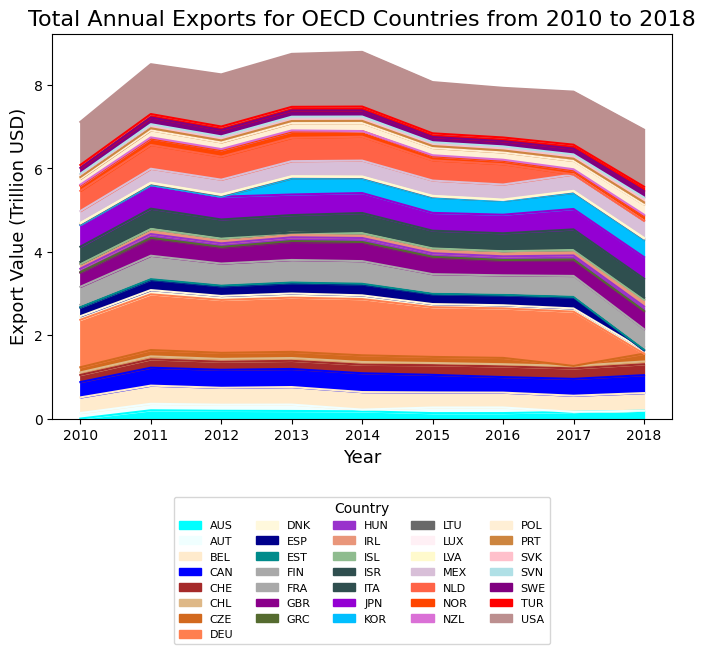

In [104]:
# Create subplot & adjust sizes
fig_1_ex, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_exports.plot(kind='area', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Exports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor= (0.5, -0.6),loc='lower center', ncol=5)

# Set x-axis label horizontally & set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart & include legend in the in the plotting area (after using bbox_on_anchor)
fig_1_ex.savefig("exports-stacked-area-chart.png", bbox_inches='tight')

#### 2. Stacked bar chart - Total Annual exports for each country for each year from 2010 to 2018

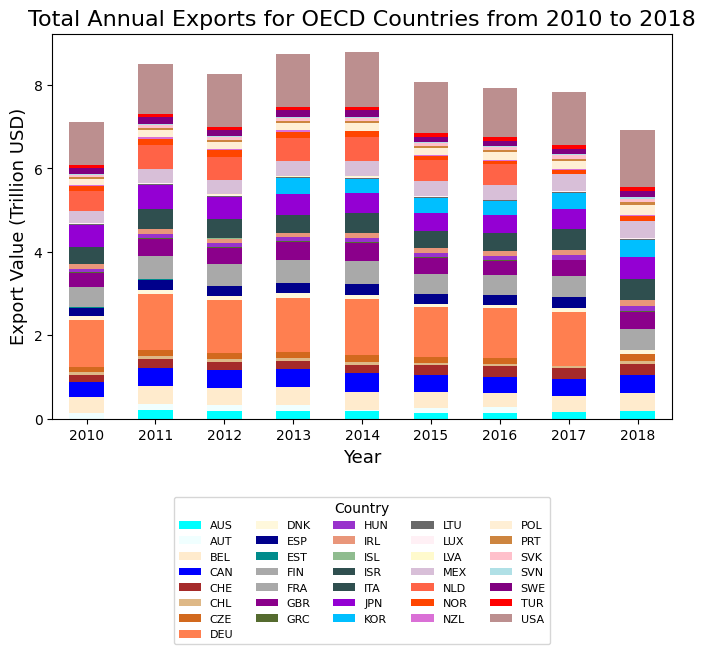

In [105]:
# Create subplot & adjust sizes
fig_2_ex, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_exports.plot(kind='bar', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Exports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_2_ex.savefig("exports-stacked-bar-chart.png", bbox_inches='tight')

#### 3. Normalized stacked bar chart - Total Annual exports for each country for each year from 2010 to 2018

In [106]:
# Create a copy of the exports data
country_exports_norm = country_exports.copy()

# Add a column 'TOTAL' to sum all country imports by year
country_exports_norm['TOTAL'] = country_exports_norm.sum(axis=1)

# Loop through data to return the % imports of each country/total imports of all country each year
for country in country_exports_norm:
     country_exports_norm[country] = (country_exports_norm[country] / country_exports_norm['TOTAL']) * 100

# Remove column 'TOTAL'
country_exports_norm.drop('TOTAL', axis=1, inplace=True)

country_exports_norm

CountryCode,AUS,AUT,BEL,CAN,CHE,CHL,CZE,DEU,DNK,ESP,...,NLD,NOR,NZL,POL,PRT,SVK,SVN,SWE,TUR,USA
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,1.854784,5.272710,5.175197,2.391538,0.866064,1.734788,16.008296,1.198919,2.913593,...,6.803649,1.759009,0.327284,1.981882,0.584590,0.862836,0.268908,1.968728,0.977112,14.513770
2011,2.337322,1.829691,5.126547,5.051202,2.373256,0.831315,1.782544,15.735037,1.186505,2.887961,...,6.708440,1.814023,0.327429,2.004296,0.587248,0.869779,0.267337,1.893019,0.968796,14.064636
2012,2.258363,1.763514,4.912760,5.235743,2.341833,0.820549,1.758668,15.373571,1.156364,2.807792,...,6.689995,1.866591,0.333408,1.945851,0.575145,0.920096,0.253859,1.846309,1.012698,15.146595
2013,2.083752,1.751024,4.809609,4.956958,2.235039,0.756141,1.700090,14.870833,1.131650,2.822901,...,6.395168,1.684947,0.340580,2.013708,0.583191,0.916760,0.260561,1.707471,0.993043,14.523157
2014,1.975429,0.463006,4.786302,5.133924,2.332422,0.733816,1.824943,15.326897,1.023993,2.963342,...,6.511836,1.551171,0.000000,2.177089,0.594781,0.910719,0.276164,1.667251,1.053097,14.905384
2015,1.613311,1.662062,4.481044,5.232287,2.865571,0.660368,1.805391,14.772342,0.934903,2.895797,...,6.001741,1.206372,0.316163,2.162251,0.581726,0.865301,0.257844,1.557646,1.095935,15.224367
2016,1.656528,1.691559,4.491820,4.700773,3.225165,0.668669,1.904630,14.968053,0.947701,2.993050,...,6.154296,1.027348,0.316643,2.209917,0.605739,0.911319,0.306630,1.587931,1.107821,15.011296
2017,2.031271,0.000000,4.953350,5.150016,3.201866,0.766179,0.000000,16.587317,0.993779,3.351117,...,0.000000,1.213647,0.362660,2.550392,0.686094,0.989881,0.318238,1.766207,1.210114,16.226227
2018,2.724210,0.000000,6.098382,6.212035,3.761145,0.966059,2.690222,0.000000,1.176499,0.000000,...,0.000000,1.683009,0.433410,3.425512,0.863875,1.262622,0.412717,2.174746,1.549565,19.729509


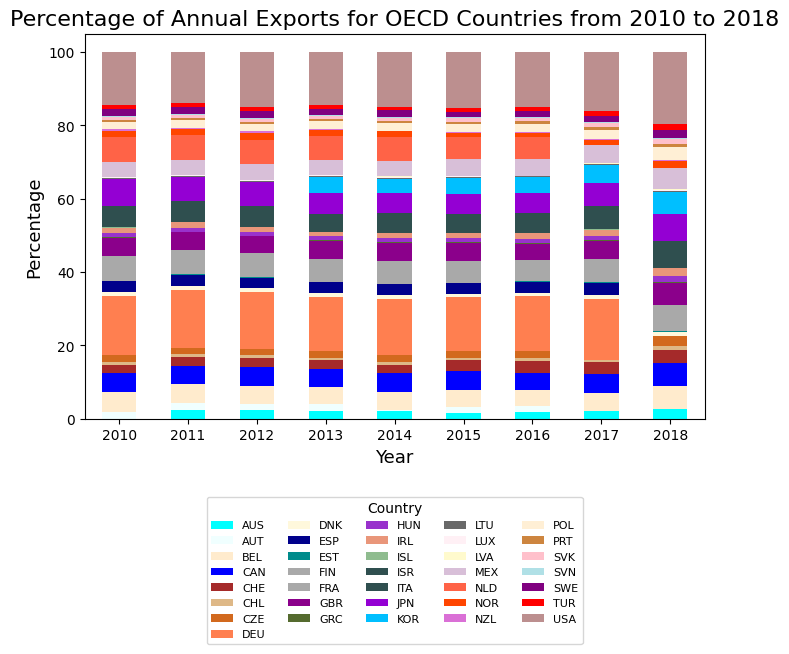

In [107]:
# Create subplot & adjust sizes
fig_3_ex, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_exports_norm.plot(kind='bar', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Percentage of Annual Exports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Percentage', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_3_ex.savefig("exports-norm-stacked-bar-chart.png", bbox_inches='tight')

## Part 2: Total Annual Imports

In [108]:
# Make a copy of trade data filtering for exports data only
country_imports = trade[trade['TradeType'] == 'IMP'].copy()

# Convert value into per trillion USD (for better visibility when graphing)
country_imports['TradeValue'] = country_imports['TradeValue'] / 1_000_000_000_000

# Sum up each country exports for each year
country_imports = country_imports.groupby(['CountryCode', 'Year'])['TradeValue'].sum()

# Unstack the dataframe to have year as the rows and each country as a column
# Fill in 0 for empty/missing data
country_imports = country_imports.unstack(level='CountryCode').fillna(0)
country_imports

CountryCode,AUS,AUT,BEL,CAN,CHE,CHL,CZE,DEU,DNK,ESP,...,NLD,NOR,NZL,POL,PRT,SVK,SVN,SWE,TUR,USA
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,0.141888,0.362912,0.355205,0.162271,0.050216,0.115021,0.933865,0.079373,0.261019,...,0.429672,0.072085,0.023872,0.162631,0.069193,0.053623,0.022007,0.141739,0.143754,1.634712
2011,0.171560,0.167233,0.431074,0.402247,0.191408,0.062680,0.137618,1.096113,0.092438,0.295398,...,0.507762,0.084920,0.028859,0.192419,0.073074,0.072643,0.025902,0.166577,0.183668,1.874568
2012,0.185851,0.155390,0.401265,0.410857,0.183746,0.067686,0.127761,1.011326,0.088348,0.257771,...,0.492977,0.081561,0.029371,0.176002,0.061577,0.061505,0.023459,0.153795,0.176776,1.967852
2013,0.172724,0.160252,0.411945,0.419857,0.183977,0.067261,0.128593,1.036565,0.091473,0.260223,...,0.491342,0.083342,0.030544,0.185345,0.064082,0.067329,0.024593,0.149536,0.189267,1.989483
2014,0.171319,0.027773,0.411314,0.429350,0.185456,0.060796,0.135941,1.069221,0.091870,0.289210,...,0.491015,0.082781,0.000000,0.196182,0.065621,0.064937,0.025537,0.152399,0.183127,2.074840
2015,0.158472,0.139233,0.338302,0.423150,0.220258,0.053694,0.125091,0.923058,0.079381,0.260185,...,0.412725,0.070848,0.029385,0.170422,0.059600,0.059301,0.021845,0.130400,0.160907,2.004414
2016,0.151843,0.140564,0.326041,0.374175,0.207845,0.051518,0.127930,0.912832,0.078601,0.254510,...,0.420510,0.067167,0.029711,0.169181,0.062189,0.060832,0.024600,0.133051,0.155350,1.945720
2017,0.170652,0.000000,0.366974,0.403215,0.214998,0.056267,0.000000,1.016920,0.085430,0.284216,...,0.000000,0.075495,0.032090,0.197165,0.071277,0.065494,0.026451,0.144574,0.176358,2.075663
2018,0.178747,0.000000,0.411890,0.429187,0.233019,0.064731,0.164190,0.000000,0.093655,0.000000,...,0.000000,0.081980,0.034667,0.239745,0.079641,0.072959,0.030712,0.159180,0.168722,2.254076


#### 1. Stacked area chart - Total Annual imports for each country for each year from 2010 to 2018

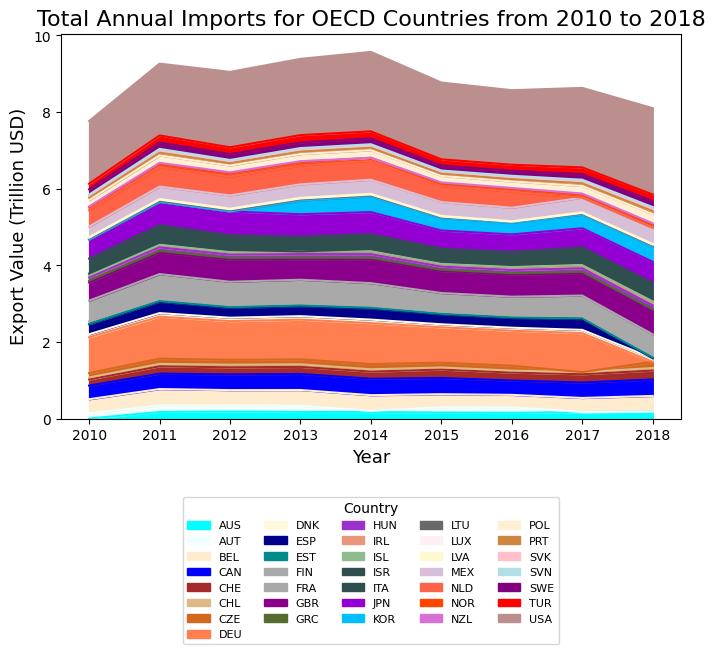

In [109]:
# Create subplot & adjust sizes
fig_1_im, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_imports.plot(kind='area', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Imports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_1_im.savefig("imports-stacked-area-chart.png", bbox_inches='tight')

#### 2. Stacked bar chart - Total Annual imports for each country for each year from 2010 to 2018

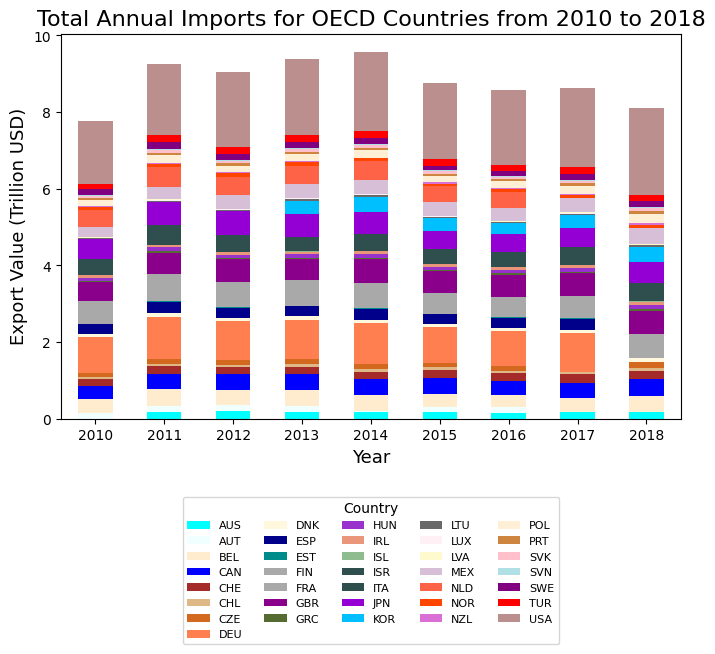

In [110]:
# Create subplot & adjust sizes
fig_2_im, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_imports.plot(kind='bar', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Total Annual Imports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Export Value (Trillion USD)', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_2_im.savefig("imports-stacked-bar-chart.png", bbox_inches='tight')

#### 3. Normalized stacked bar chart - Total Annual imports for each country for each year from 2010 to 2018

In [111]:
# Create a copy of the imports data
country_imports_norm = country_imports.copy()

# Add a column 'TOTAL' to sum all country imports by year
country_imports_norm['TOTAL'] = country_imports_norm.sum(axis=1)

# Loop through data to return the % imports of each country/total imports of all country each year
for country in country_imports_norm:
     country_imports_norm[country] = (country_imports_norm[country] / country_imports_norm['TOTAL']) * 100

# Remove column 'TOTAL'
country_imports_norm.drop('TOTAL', axis=1, inplace=True)

country_imports_norm

CountryCode,AUS,AUT,BEL,CAN,CHE,CHL,CZE,DEU,DNK,ESP,...,NLD,NOR,NZL,POL,PRT,SVK,SVN,SWE,TUR,USA
Year,,,,,,,,,,,,,,,,,,,,,
2010,0.000000,1.827480,4.674206,4.574949,2.090001,0.646765,1.481438,12.027923,1.022298,3.361848,...,5.534057,0.928433,0.307468,2.094644,0.891191,0.690649,0.283443,1.825560,1.851519,21.054652
2011,1.851888,1.805178,4.653175,4.342012,2.066129,0.676588,1.485506,11.831867,0.997813,3.188644,...,5.480974,0.916664,0.311512,2.077045,0.788787,0.784140,0.279595,1.798091,1.982584,20.234803
2012,2.053904,1.717269,4.434524,4.540525,2.030646,0.748020,1.411927,11.176513,0.976365,2.848714,...,5.448055,0.901355,0.324592,1.945064,0.680514,0.679714,0.259255,1.699641,1.953614,21.747419
2013,1.839753,1.706904,4.387786,4.472066,1.959610,0.716419,1.369697,11.040863,0.974317,2.771738,...,5.233481,0.887712,0.325333,1.974182,0.682567,0.717149,0.261955,1.592769,2.015957,21.190770
2014,1.790074,0.290189,4.297734,4.486184,1.937788,0.635246,1.420420,11.172059,0.959934,3.021887,...,5.130508,0.864957,0.000000,2.049865,0.685663,0.678507,0.266828,1.592385,1.913453,21.679548
2015,1.806896,1.587528,3.857318,4.824755,2.511384,0.612224,1.426288,10.524699,0.905100,2.966626,...,4.705888,0.807814,0.335049,1.943149,0.679562,0.676152,0.249080,1.486824,1.834664,22.854310
2016,1.771647,1.640046,3.804114,4.365716,2.425052,0.601086,1.492632,10.650541,0.917079,2.969517,...,4.906339,0.783673,0.346653,1.973933,0.725600,0.709758,0.287021,1.552384,1.812562,22.701861
2017,1.977256,0.000000,4.251948,4.671848,2.491079,0.651938,0.000000,11.782548,0.989836,3.293071,...,0.000000,0.874726,0.371808,2.284450,0.825855,0.758844,0.306475,1.675112,2.043375,24.049684
2018,2.206311,0.000000,5.084059,5.297553,2.876204,0.798990,2.026641,0.000000,1.156010,0.000000,...,0.000000,1.011894,0.427902,2.959229,0.983023,0.900545,0.379084,1.964794,2.082576,27.822584


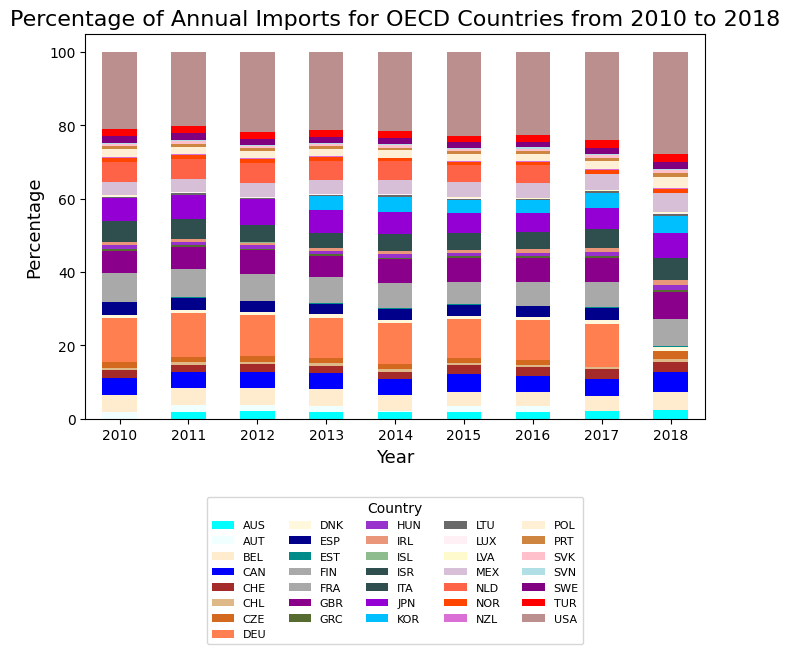

In [112]:
# Create subplot & adjust sizes
fig_3_im, ax = plt.subplots(figsize=(8,5))

# Plot the unstacked exports data (colormap - map each country to a different color)
country_imports_norm.plot(kind='bar', stacked=True, ax=ax, colormap=custom_colormap)

# Add titles, labels, legends and adjust fontsize
ax.set_title('Percentage of Annual Imports for OECD Countries from 2010 to 2018', fontsize=16)
ax.set_xlabel('Year', fontsize=13)
ax.set_ylabel('Percentage', fontsize=13)
ax.legend(title='Country', fontsize=8, bbox_to_anchor=(0.5, -0.6), loc='lower center', ncol=5)

# Set y-axis starting from 0
plt.xticks(rotation=0)
ax.set_ylim(bottom=0)

# Show the chart
plt.show()

# Save chart
fig_3_im.savefig("imports-norm-stacked-bar-chart.png", bbox_inches='tight')

## Task 5: Canadian Export Partner Analysis

In [113]:
# Filter for Canada's export data
canada_exports = trade[(trade['CountryCode'] == 'CAN') & (trade['TradeType'] == 'EXP')].reset_index(drop=True)

In [114]:
# Aggregate total exports by partner country across all years
total_exports = canada_exports.groupby('PartnerCountryCode')['TradeValue'].sum().reset_index()

# Sort the total exports in descending order to get the top 10 export partners
top10_exports = total_exports.sort_values('TradeValue', ascending=False).head(10).reset_index(drop=True)
top10_exports

,PartnerCountryCode,TradeValue
0,USA,2954853365434
1,CHN,161732469853
2,GBR,129051058180
3,JPN,85993761339
4,MEX,51308771770
5,KOR,35003976970
6,NLD,30580138613
7,DEU,30400474236
8,IND,25667456968
9,FRA,25081556454


In [115]:
# Filter for fixed top 10 export partners
filtered_top_10 = canada_exports[canada_exports['PartnerCountryCode'].isin(top10_exports['PartnerCountryCode'])]

In [116]:
# Rank export partners by year
filtered_top_10 = filtered_top_10.copy()
filtered_top_10['Rank'] = filtered_top_10.groupby('Year')['TradeValue'].rank(ascending=False).astype(int)

In [117]:
# Pivot the data to get the top 10 export partners by year
pivot_top_10 = filtered_top_10.pivot(index='Year', columns='PartnerCountryCode', values='Rank')

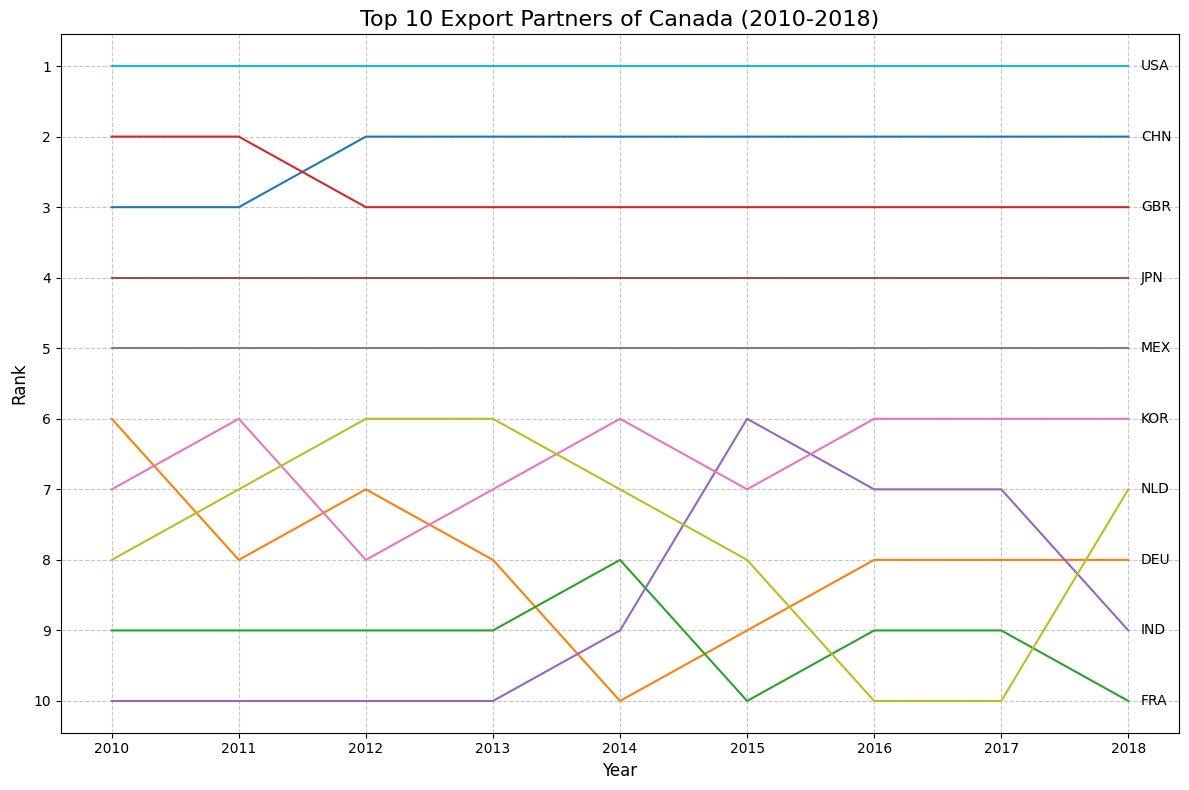

In [118]:
# Plot the line chart
plt.figure(figsize=(12, 8))  # Set the figure size

# Plot each country's rank trend
for country in pivot_top_10.columns:
    plt.plot(pivot_top_10.index, pivot_top_10[country], label=country)
    # Add annotation at the last year
    last_year = pivot_top_10.index[-1]
    last_rank = pivot_top_10[country].iloc[-1]
    plt.text(last_year + 0.1, last_rank, country, verticalalignment='center', fontsize=10)

plt.gca().invert_yaxis()  # Invert the y-axis to make rank 1 appear at the top

# Add title and axis labels
plt.title("Top 10 Export Partners of Canada (2010-2018)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Rank", fontsize=12)

# Set custom y-axis ticks to increment by 1
plt.yticks(np.arange(1, 11, 1))  # Range from 1 to 10 with step 1

# Adjust layout to prevent text cut-off
plt.subplots_adjust(right=0.85)  # Increase the right margin

# Add grid
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()

# Save the plot
plt.savefig('canada-top-10-exports.png', bbox_inches='tight')

plt.show()



### Identify Japan's Rank

In [119]:
# Filter for Japan's rank
japan_rank = filtered_top_10[filtered_top_10['PartnerCountryCode'] == 'JPN'].reset_index(drop=True)

# Dislpay Japan's rank by year
japan_rank[['Year', 'Rank']]

,Year,Rank
0,2010,4
1,2011,4
2,2012,4
3,2013,4
4,2014,4
5,2015,4
6,2016,4
7,2017,4
8,2018,4


### Determine when China Overtakes the UK

In [120]:
# Filter for China and UK data
china_uk = filtered_top_10[filtered_top_10['PartnerCountryCode'].isin(['CHN', 'GBR'])]

# Pivot the data to get the exports of China and UK by year
pivot_china_uk = china_uk.pivot(index='Year', columns='PartnerCountryCode', values='TradeValue')
pivot_china_uk

PartnerCountryCode,CHN,GBR
Year,,
2010,12861932302,15303925783
2011,16922234642,17599103521
2012,22440884541,16839187311
2013,19802180609,13092389068
2014,17472788454,13760764330
2015,16967593508,13308016260
2016,15827259404,12912053554
2017,18195008186,13637261151
2018,21242588207,12598357202


In [121]:
# Determine the yaer when China overtakes the UK in Canada's exports
pivot_china_uk['ChinaOvertake'] = pivot_china_uk['CHN'] > pivot_china_uk['GBR']
china_overtake_year = pivot_china_uk[pivot_china_uk['ChinaOvertake']].index.min()

print(f"China overtakes the UK in Canada's exports in {china_overtake_year}")

China overtakes the UK in Canada's exports in 2012
